# Goal: Predict whether a person has diabetes.

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [73]:
df = pd.read_csv("Data/diabetes.csv")

In [74]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [75]:
df.duplicated().sum()

np.int64(0)

In [76]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


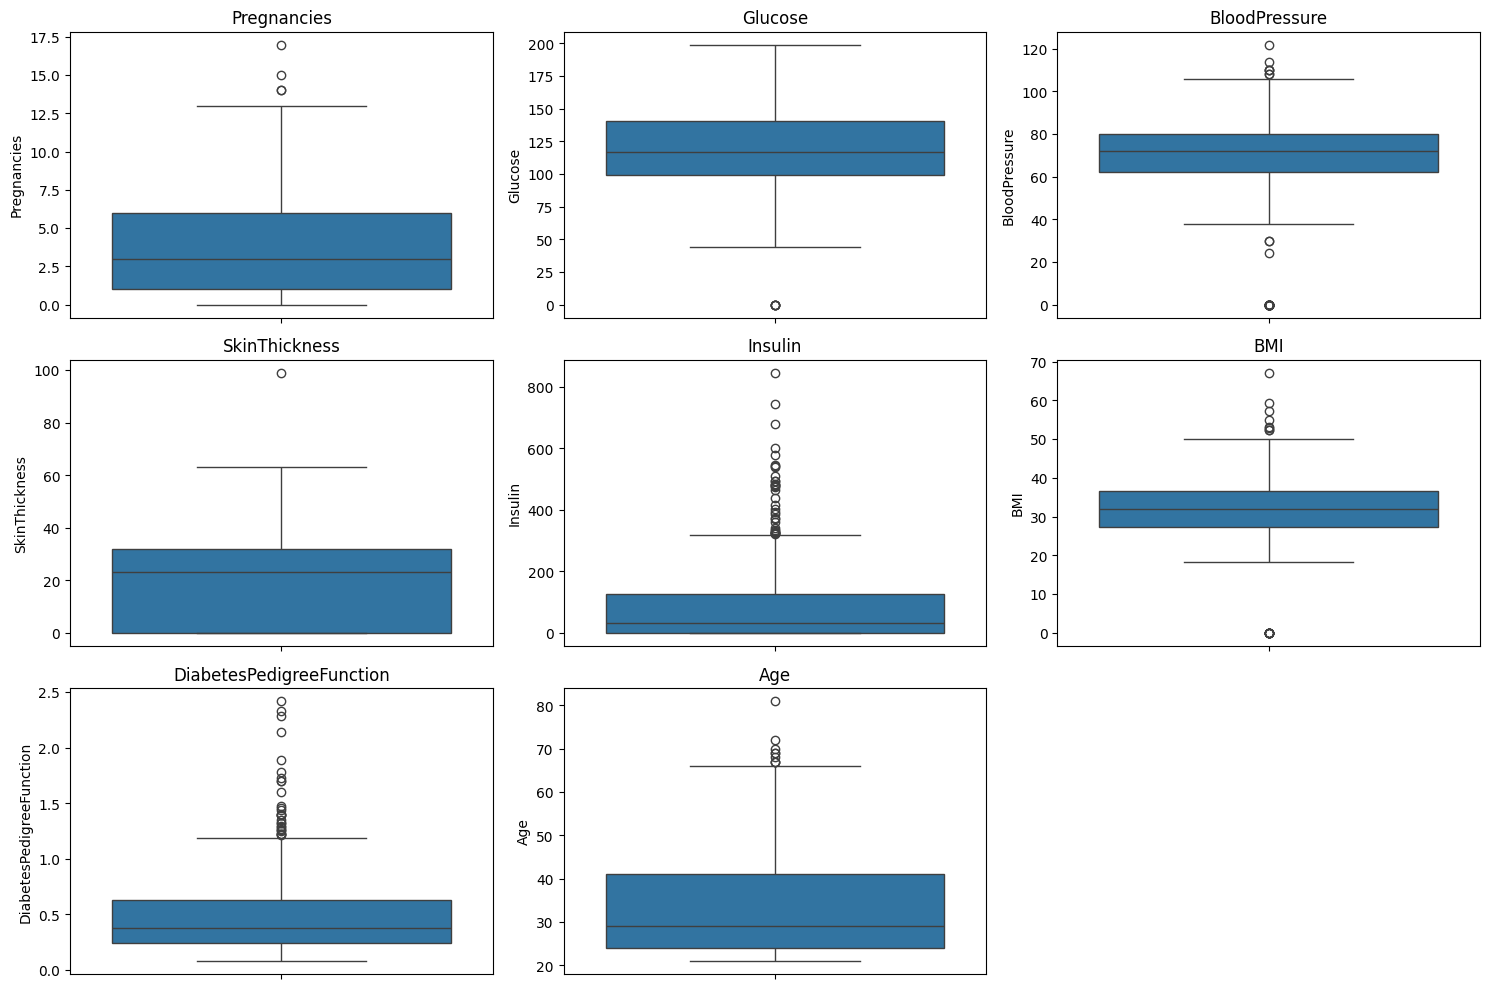

In [78]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Outlier Removal:

In [79]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

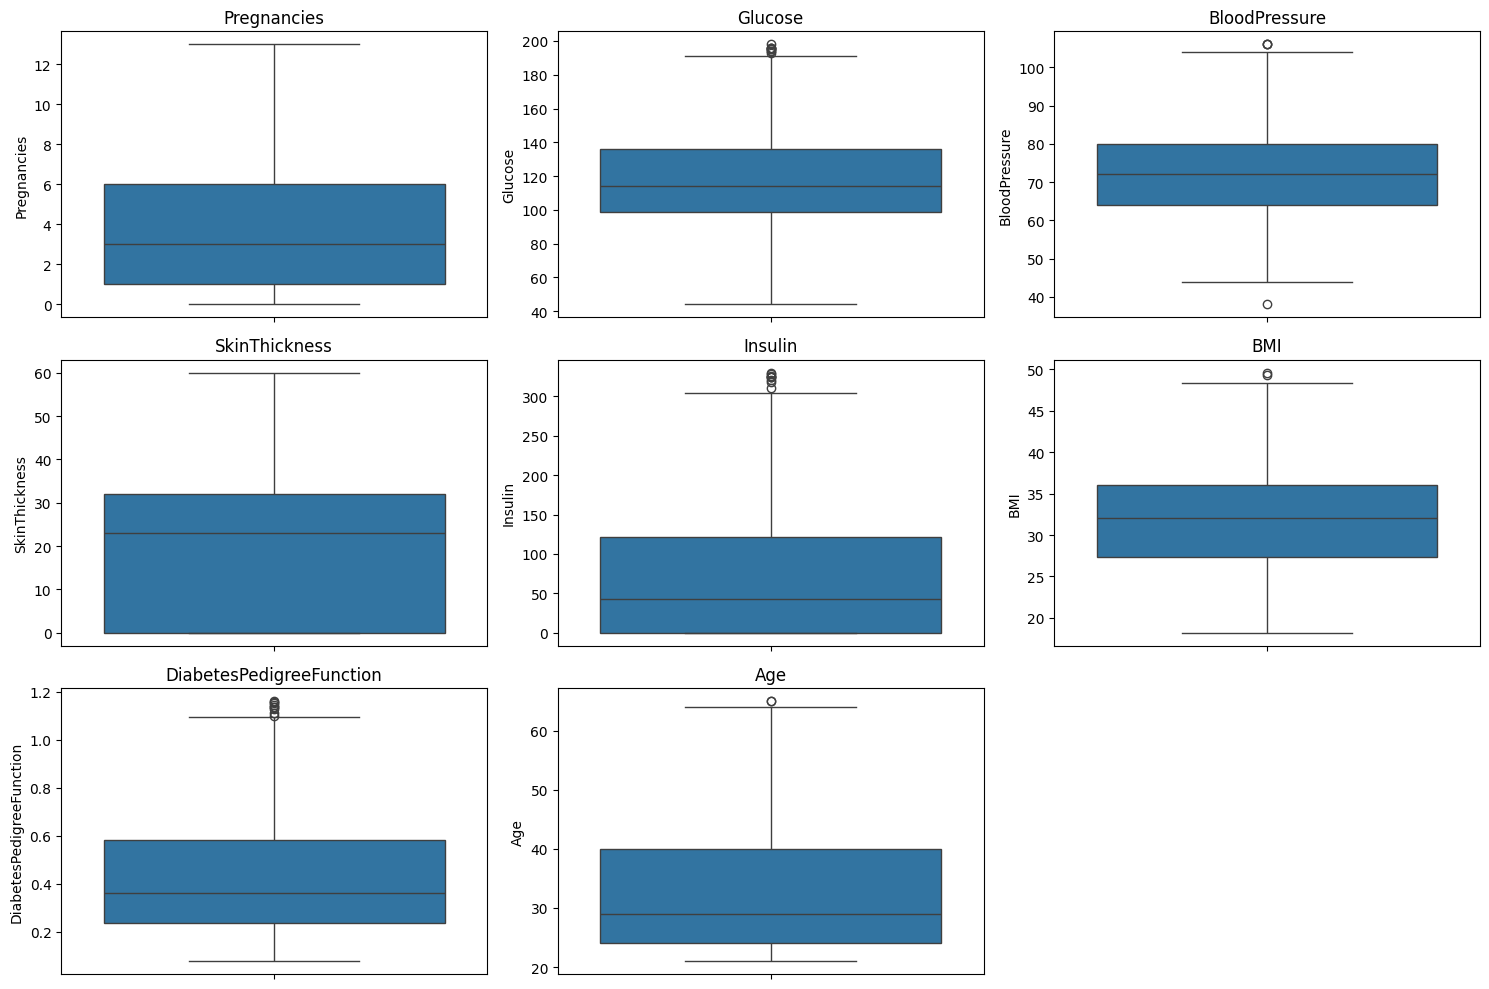

In [80]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [81]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Train K-NN with different values of k (try 1, 3, 5, 7)

In [82]:
X, y = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46, stratify=y)

K = [1, 3, 5, 7]
for k in K:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])

    model.fit(X_train, y_train)
    y_pred_knn = model.predict(X_test)

    acc = model.score(X_test, y_test)
    prec = precision_score(y_test, y_pred_knn)
    rec = recall_score(y_test, y_pred_knn)
    f1 = f1_score(y_test, y_pred_knn)

    print(f"\nKNN (k={k})")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")


KNN (k=1)
Accuracy : 0.6875
Precision: 0.5000
Recall   : 0.4750
F1-score : 0.4872

KNN (k=3)
Accuracy : 0.7188
Precision: 0.5588
Recall   : 0.4750
F1-score : 0.5135

KNN (k=5)
Accuracy : 0.7109
Precision: 0.5429
Recall   : 0.4750
F1-score : 0.5067

KNN (k=7)
Accuracy : 0.7109
Precision: 0.5455
Recall   : 0.4500
F1-score : 0.4932


### Train Logistic Regression algo:

In [ ]:
L = [100, 200, 300, 400, 500, 600]
for l in L:
    model_lc = Pipeline([
        ("scaler", StandardScaler()),
        ("lc", LogisticRegression(max_iter=l, multi_class="multinomial"))
    ])

    model_lc.fit(X_train, y_train)
    y_pred_lc = model_lc.predict(X_test)

    acc = model_lc.score(X_test, y_test)
    prec = precision_score(y_test, y_pred_lc)
    rec = recall_score(y_test, y_pred_lc)
    f1 = f1_score(y_test, y_pred_lc)

    print(f"\nLogistic Regression (max_iter={l})")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")


Logistic Regression (max_iter=100)
Accuracy : 0.7266
Precision: 0.5676
Recall   : 0.5250
F1-score : 0.5455

Logistic Regression (max_iter=200)
Accuracy : 0.7266
Precision: 0.5676
Recall   : 0.5250
F1-score : 0.5455

Logistic Regression (max_iter=300)
Accuracy : 0.7266
Precision: 0.5676
Recall   : 0.5250
F1-score : 0.5455

Logistic Regression (max_iter=400)
Accuracy : 0.7266
Precision: 0.5676
Recall   : 0.5250
F1-score : 0.5455

Logistic Regression (max_iter=500)
Accuracy : 0.7266
Precision: 0.5676
Recall   : 0.5250
F1-score : 0.5455

Logistic Regression (max_iter=600)
Accuracy : 0.7266
Precision: 0.5676
Recall   : 0.5250
F1-score : 0.5455


c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its d

### Discuss which one performs better and why:

Logistic Regression is the better choice for this problem, because of higher accuracy, precision, recall, and F1-score, making it more reliable for predict whether a person has diabetes.